In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd 'drive/MyDrive'

/content/drive/MyDrive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [28]:
data_dir = './data/gender_dataset_face/'
img_height = 128
img_width = 128
batch_size = 64

In [29]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,validation_split=0.2)


In [30]:
train_ds = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',seed=123,color_mode = 'rgb',subset='training')


Found 1847 images belonging to 2 classes.


In [31]:
val_ds = train_datagen.flow_from_directory(
  data_dir,
  subset="validation",
  seed=123,color_mode = 'rgb',
  target_size=(img_height, img_width),
  batch_size = batch_size,class_mode='categorical')

Found 460 images belonging to 2 classes.


In [46]:
model = Sequential()


#1st CNN layer
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))


# Fully connected layer 2nd layer

model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_34 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_43 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_35 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
activation_44 (Activation)   (None, 64, 64, 64)       

In [47]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [48]:
history = model.fit(
    train_ds,
    steps_per_epoch = train_ds.n//batch_size,
    epochs = 30,
    verbose = 1,
    validation_data = val_ds,
    validation_steps = val_ds.n//batch_size
)

Epoch 1/30
28/28 [==============================] - 15s 469ms/step - loss: 7.8542 - accuracy: 0.5392 - val_loss: 0.6685 - val_accuracy: 0.7701
Epoch 2/30
28/28 [==============================] - 12s 451ms/step - loss: 0.5723 - accuracy: 0.7159 - val_loss: 0.6807 - val_accuracy: 0.4933
Epoch 3/30
28/28 [==============================] - 12s 448ms/step - loss: 0.4771 - accuracy: 0.7542 - val_loss: 0.6645 - val_accuracy: 0.5424
Epoch 4/30
28/28 [==============================] - 12s 449ms/step - loss: 0.3947 - accuracy: 0.8143 - val_loss: 0.6865 - val_accuracy: 0.5045
Epoch 5/30
28/28 [==============================] - 12s 450ms/step - loss: 0.3739 - accuracy: 0.8242 - val_loss: 0.6398 - val_accuracy: 0.7768
Epoch 6/30
28/28 [==============================] - 12s 456ms/step - loss: 0.3054 - accuracy: 0.8518 - val_loss: 0.6725 - val_accuracy: 0.5067
Epoch 7/30
28/28 [==============================] - 12s 445ms/step - loss: 0.2931 - accuracy: 0.8649 - val_loss: 0.6401 - val_accuracy: 0.5156

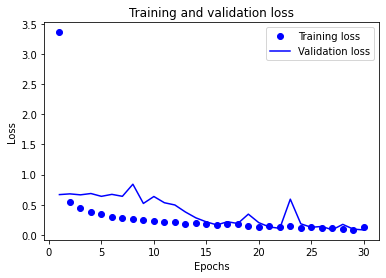

In [49]:
import matplotlib.pyplot as plt

loss = history .history['loss']
val_loss = history .history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

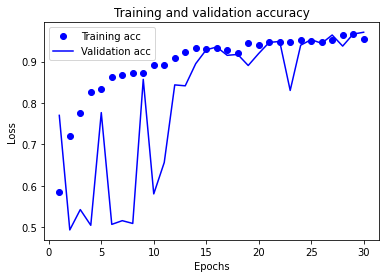

In [50]:
plt.clf()   # clear figure

acc = history .history['accuracy']
val_acc = history .history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
model.save('model_gendera.h5')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path , target_size = (128, 128))
  x= image.img_to_array(img)/255.0
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  c = model.predict(images, batch_size = 10)
  print(c)
  

Saving anh34.jpg to anh34.jpg
[[0.86023486 0.13976511]]
